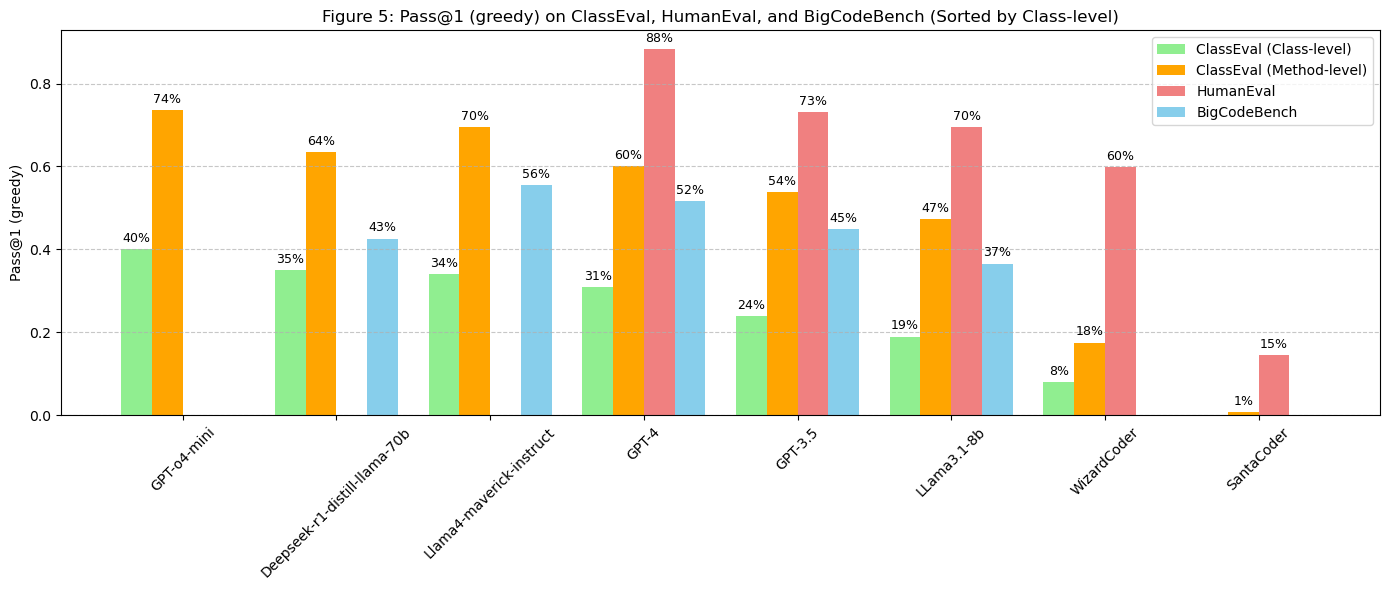

In [4]:
# Plotting code for ClassEval vs HumanEval Pass@1
import matplotlib.pyplot as plt

# Data
models = [
    "GPT-4", "GPT-3.5", "WizardCoder", "SantaCoder", "GPT-o4-mini", "LLama3.1-8b", "Deepseek-r1-distill-llama-70b", "Llama4-maverick-instruct"
]
class_level = [
    0.31,  # GPT-4 - no data provided, placeholder
    0.24,   # GPT-3.5 - no data provided, placeholder
    0.08,  # WizardCoder
    0.0,   # SantaCoder
    0.4,   # GPT-o4-mini
    0.19,  # LLama3.1-8b
    0.35,  # Deepseek-r1-distill-llama-70b
    0.34   # Llama4-maverick-instruct
]

method_level = [
    0.601593625498008,   # GPT-4
    0.5378486055776892,  # GPT-3.5 - no data provided, placeholder
    0.1752988047808765,  # WizardCoder
    0.00796812749003984, # SantaCoder
    0.7350597609561753,  # GPT-o4-mini
    0.47410358565737054, # LLama3.1-8b
    0.6354581673306773,  # Deepseek-r1-distill-llama-70b
    0.6952191235059761   # Llama4-maverick-instruct
]
human_eval = [
    0.884,   # GPT-4
    0.732,  # GPT-3.5 - no data provided, placeholder
    0.598,  # WizardCoder
    0.146, # SantaCoder
    0.0,  # GPT-o4-mini
    0.695, # LLama3.1-8b
    0.0,  # Deepseek-r1-distill-llama-70b
    0.0   # Llama4-maverick-instruct
]
big_code_bench_full = [
    0.516,   # GPT-4 - no data provided, placeholder
    0.449,   # GPT-3.5 - no data provided, placeholder
    0.0,   # WizardCoder - no data provided, placeholder
    0.0,   # SantaCoder - no data provided, placeholder
    0.0,   # GPT-o4-mini - no data provided, placeholder
    0.366,   # LLama3.1-8b - no data provided, placeholder
    0.426,   # Deepseek-r1-distill-llama-70b - no data provided, placeholder
    0.555    # Llama4-maverick-instruct - no data provided, placeholder
]

# Sort based on class_level (descending)
sorted_data = sorted(
    zip(class_level, method_level, human_eval, big_code_bench_full, models),
    key=lambda x: x[0],
    reverse=True
)

# Unzip the sorted data
class_level, method_level, human_eval, big_code_bench_full, models = zip(*sorted_data)
 
# Plotting
x = range(len(models))
width = 0.2

plt.figure(figsize=(14, 6))

bars1 = plt.bar([p - 1.5 * width for p in x], class_level, width=width, label='ClassEval (Class-level)', color='lightgreen')
bars2 = plt.bar([p - 0.5 * width for p in x], method_level, width=width, label='ClassEval (Method-level)', color='orange')
bars3 = plt.bar([p + 0.5 * width for p in x], human_eval, width=width, label='HumanEval', color='lightcoral')
bars4 = plt.bar([p + 1.5 * width for p in x], big_code_bench_full, width=width, label='BigCodeBench', color='skyblue')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height*100:.0f}%', 
                     ha='center', va='bottom', fontsize=9)

# Apply labels to each group
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)


# Labels and Title
plt.xticks(x, models, rotation=45)
plt.ylabel('Pass@1 (greedy)')
plt.title('Figure 5: Pass@1 (greedy) on ClassEval, HumanEval, and BigCodeBench (Sorted by Class-level)')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



In [5]:
import json
import pandas as pd

# === STEP 1: Provide JSON file path ===
file_path = 'pass_at_k_result.json'  # <-- change this to your actual path

with open(file_path) as f:
    pass_k_data = json.load(f)

# === STEP 2: Extract and pivot tables per domain ===
def extract_pivoted_domain_tables(pass_k_data):
    domain_data = {"Data_Formatting": [], "Database_Operations": [], "File_Handling": [], "Game_Development": [], "Management_Systems": [], "Mathematical_Operations": [], "Natural_Language_Processing": []}

    for pass_k in ["pass_1", "pass_3", "pass_5"]:
        k = pass_k.split("_")[1]
        for model_key, metrics in pass_k_data.get(pass_k, {}).items():
            for suffix in ["_Data_Formatting", "_Database_Operations", "_File_Handling", "_Game_Development", "_Management_Systems", "_Mathematical_Operations", "_Natural_Language_Processing"]:
                if suffix in model_key:
                    domain = suffix.strip('_')
                    model = model_key.replace(suffix, "").replace("(greedy)", "").strip()
                    break
            else:
                continue

            domain_data[domain].append({
                "Model": model,
                f"Class@{k}": round(metrics.get("class_success", 0.0) * 100, 1),
                f"Method@{k}": round(metrics.get("fun_success", 0.0) * 100, 1)
            })

    pivoted_tables = {}
    for domain, rows in domain_data.items():
        df = pd.DataFrame(rows)
        df = df.groupby("Model").first().reset_index()

        # Ensure consistent column order
        ordered_cols = ["Model", "Method@1", "Method@3", "Method@5", "Class@1", "Class@3", "Class@5"]
        existing_cols = [col for col in ordered_cols if col in df.columns]
        df = df[existing_cols]

        pivoted_tables[domain] = df.sort_values("Model")

    return pivoted_tables

# === STEP 3: Display all domain tables ===
pivoted_tables = extract_pivoted_domain_tables(pass_k_data)

for domain, df in pivoted_tables.items():
    name = "Domain = " + domain.replace("_", " ").title()
    print(f"\n{name}")
    display(df)



Domain = Data Formatting


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,49.8,57.5,58.5,30.0,36.5,38.5
1,Chatgpt-o4-mini,75.5,79.2,81.5,42.3,48.8,53.8
2,Deepseek-r1-distill-llama-70b,59.5,64.6,66.2,32.3,38.1,38.5
3,Deepseek-r1-distill-llama-70b-testpred,60.6,67.1,70.0,29.2,35.0,38.5
4,GPT-4,60.8,65.2,66.9,34.6,40.4,42.3
5,Gemini-2.5-flash,76.2,81.8,82.3,53.8,66.5,69.2
6,Llama3.1-8b,45.7,59.0,61.5,18.5,28.5,30.8
7,Llama4-maverick-instruct,64.6,70.8,73.1,31.5,37.7,42.3
8,SantaCoder,0.8,0.8,0.8,0.0,0.0,0.0
9,WizardCoder,25.7,43.3,51.5,13.8,23.1,26.9



Domain = Database Operations


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,58.3,65.6,66.7,28.6,41.4,42.9
1,Chatgpt-o4-mini,79.4,84.4,88.9,74.3,80.0,85.7
2,Deepseek-r1-distill-llama-70b,67.8,73.9,75.0,62.9,70.0,71.4
3,Deepseek-r1-distill-llama-70b-testpred,59.4,69.2,69.4,45.7,57.1,57.1
4,GPT-4,77.2,81.7,86.1,60.0,65.7,71.4
5,Gemini-2.5-flash,80.6,87.8,88.9,71.4,84.3,85.7
6,Gemini-2.5-flash-testpred,72.8,88.6,88.9,65.7,84.3,85.7
7,Llama3.1-8b,52.8,77.2,86.1,45.7,72.9,85.7
8,Llama4-maverick-instruct,86.7,88.9,88.9,82.9,85.7,85.7
9,SantaCoder,2.8,2.8,2.8,0.0,0.0,0.0



Domain = File Handling


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,56.7,57.1,57.1,33.3,33.3,33.3
1,Chatgpt-o4-mini,58.6,63.3,64.3,35.6,51.1,55.6
2,Deepseek-r1-distill-llama-70b,61.4,64.0,64.3,46.7,54.4,55.6
3,Deepseek-r1-distill-llama-70b-testpred,62.4,68.8,69.0,48.9,65.6,66.7
4,GPT-4,60.0,63.8,64.3,42.2,44.4,44.4
5,Gemini-2.5-flash,53.8,58.6,59.5,31.1,40.0,44.4
6,Gemini-2.5-flash-testpred,55.7,61.4,64.3,33.3,46.7,55.6
7,Llama3.1-8b,48.6,55.2,57.1,20.0,28.9,33.3
8,Llama4-maverick-instruct,54.3,61.0,61.9,28.9,38.9,44.4
9,SantaCoder,0.0,0.0,0.0,0.0,0.0,0.0



Domain = Game Development


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,61.3,64.4,64.4,10.0,10.0,10.0
1,Chatgpt-o4-mini,76.0,85.3,86.7,34.0,48.0,50.0
2,Deepseek-r1-distill-llama-70b,77.3,85.1,86.7,34.0,48.0,50.0
3,Deepseek-r1-distill-llama-70b-testpred,74.7,83.6,86.7,32.0,45.0,50.0
4,GPT-4,52.4,59.8,60.0,20.0,20.0,20.0
5,Gemini-2.5-flash,64.9,83.1,88.9,34.0,54.0,60.0
6,Gemini-2.5-flash-testpred,64.9,81.3,86.7,38.0,52.0,60.0
7,Llama3.1-8b,48.4,63.1,66.7,22.0,29.0,30.0
8,Llama4-maverick-instruct,71.1,79.3,82.2,36.0,46.0,50.0
9,SantaCoder,3.6,4.4,4.4,0.0,0.0,0.0



Domain = Management Systems


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,68.1,71.4,71.5,27.4,29.6,29.6
1,Chatgpt-o4-mini,79.2,82.5,84.1,38.5,43.0,44.4
2,Deepseek-r1-distill-llama-70b,75.9,80.9,82.1,31.1,38.9,40.7
3,Deepseek-r1-distill-llama-70b-testpred,72.1,79.7,82.1,23.7,29.3,29.6
4,GPT-4,71.4,73.6,74.2,25.2,25.9,25.9
5,Gemini-2.5-flash,75.4,83.0,84.8,21.5,33.0,37.0
6,Llama3.1-8b,50.3,65.8,69.5,14.1,22.6,25.9
7,Llama4-maverick-instruct,74.2,78.5,79.5,23.0,29.3,29.6
8,SantaCoder,0.0,0.0,0.0,0.0,0.0,0.0
9,WizardCoder,15.9,32.8,41.1,5.2,11.5,14.8



Domain = Mathematical Operations


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,47.7,51.1,53.0,26.2,28.7,31.2
1,Chatgpt-o4-mini,73.5,78.1,78.3,42.5,49.4,50.0
2,Deepseek-r1-distill-llama-70b,61.9,71.0,73.5,41.2,43.8,43.8
3,Deepseek-r1-distill-llama-70b-testpred,57.1,65.1,67.5,32.5,41.2,43.8
4,GPT-4,52.3,56.3,57.8,31.2,31.2,31.2
5,Gemini-2.5-flash,73.5,79.0,80.7,47.5,53.8,56.2
6,Gemini-2.5-flash-testpred,69.9,77.6,78.3,37.5,48.1,50.0
7,Llama3.1-8b,44.8,57.3,61.4,25.0,34.4,37.5
8,Llama4-maverick-instruct,68.2,73.5,75.9,43.8,47.5,50.0
9,SantaCoder,0.0,0.0,0.0,0.0,0.0,0.0



Domain = Natural Language Processing


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,40.0,40.0,40.0,20.0,20.0,20.0
1,Chatgpt-o4-mini,46.7,46.7,46.7,20.0,20.0,20.0
2,Deepseek-r1-distill-llama-70b,30.7,42.7,46.7,8.0,18.0,20.0
3,Deepseek-r1-distill-llama-70b-testpred,32.0,38.7,40.0,8.0,18.0,20.0
4,GPT-4,40.0,40.0,40.0,20.0,20.0,20.0
5,Gemini-2.5-flash,28.0,30.7,33.3,0.0,0.0,0.0
6,Gemini-2.5-flash-testpred,29.3,34.7,40.0,4.0,12.0,20.0
7,Llama3.1-8b,25.3,38.7,46.7,8.0,24.0,40.0
8,Llama4-maverick-instruct,45.3,52.7,53.3,16.0,20.0,20.0
9,SantaCoder,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
import json
import pandas as pd

# === STEP 1: Provide JSON file path ===
file_path = 'pass_at_k_result.json'  # <-- change this to your actual path

with open(file_path) as f:
    pass_k_data = json.load(f)

# === STEP 2: Extract and pivot domain and global tables ===
def extract_pivoted_tables(pass_k_data):
    domain_data = {
        "Data_Formatting": [], "Database_Operations": [], "File_Handling": [], "Game_Development": [],
        "Management_Systems": [], "Mathematical_Operations": [], "Natural_Language_Processing": []
    }
    overall_data = []

    for pass_k in ["pass_1", "pass_3", "pass_5"]:
        k = pass_k.split("_")[1]
        for model_key, metrics in pass_k_data.get(pass_k, {}).items():
            matched = False
            for suffix in [
                "_Data_Formatting", "_Database_Operations", "_File_Handling", "_Game_Development",
                "_Management_Systems", "_Mathematical_Operations", "_Natural_Language_Processing"
            ]:
                if suffix in model_key:
                    domain = suffix.strip('_')
                    model = model_key.replace(suffix, "").replace("(greedy)", "").strip()
                    domain_data[domain].append({
                        "Model": model,
                        f"Class@{k}": round(metrics.get("class_success", 0.0) * 100, 1),
                        f"Method@{k}": round(metrics.get("fun_success", 0.0) * 100, 1)
                    })
                    matched = True
                    break

            if not matched:
                model = model_key.replace("(greedy)", "").strip()
                overall_data.append({
                    "Model": model,
                    f"Class@{k}": round(metrics.get("class_success", 0.0) * 100, 1),
                    f"Method@{k}": round(metrics.get("fun_success", 0.0) * 100, 1)
                })

    def pivot(rows):
        df = pd.DataFrame(rows)
        df = df.groupby("Model").first().reset_index()
        ordered_cols = ["Model", "Method@1", "Method@3", "Method@5", "Class@1", "Class@3", "Class@5"]
        existing_cols = [col for col in ordered_cols if col in df.columns]
        return df[existing_cols].sort_values("Model")

    pivoted_tables = {domain: pivot(rows) for domain, rows in domain_data.items()}
    if overall_data:
        pivoted_tables["No_Specific_Domain"] = pivot(overall_data)

    return pivoted_tables

# === STEP 3: Display all tables ===
pivoted_tables = extract_pivoted_tables(pass_k_data)

for domain, df in pivoted_tables.items():
    name = "Domain = " + domain.replace("_", " ").title() if domain != "No_Specific_Domain" else "All Domains Combined"
    print(f"\n{name}")
    display(df)



Domain = Data Formatting


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,49.8,57.5,58.5,30.0,36.5,38.5
1,Chatgpt-o4-mini,75.5,79.2,81.5,42.3,48.8,53.8
2,Deepseek-r1-distill-llama-70b,59.5,64.6,66.2,32.3,38.1,38.5
3,GPT-4,60.8,65.2,66.9,34.6,40.4,42.3
4,Llama3.1-8b,45.7,59.0,61.5,18.5,28.5,30.8
5,Llama4-maverick-instruct,64.6,70.8,73.1,31.5,37.7,42.3
6,SantaCoder,0.8,0.8,0.8,0.0,0.0,0.0
7,WizardCoder,25.7,43.3,51.5,13.8,23.1,26.9



Domain = Database Operations


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,58.3,65.6,66.7,28.6,41.4,42.9
1,Chatgpt-o4-mini,79.4,84.4,88.9,74.3,80.0,85.7
2,Deepseek-r1-distill-llama-70b,67.8,73.9,75.0,62.9,70.0,71.4
3,GPT-4,77.2,81.7,86.1,60.0,65.7,71.4
4,Llama3.1-8b,52.8,77.2,86.1,45.7,72.9,85.7
5,Llama4-maverick-instruct,86.7,88.9,88.9,82.9,85.7,85.7
6,SantaCoder,2.8,2.8,2.8,0.0,0.0,0.0
7,WizardCoder,8.3,19.4,25.0,8.6,21.4,28.6



Domain = File Handling


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,56.7,57.1,57.1,33.3,33.3,33.3
1,Chatgpt-o4-mini,58.6,63.3,64.3,35.6,51.1,55.6
2,Deepseek-r1-distill-llama-70b,61.4,64.0,64.3,46.7,54.4,55.6
3,GPT-4,60.0,63.8,64.3,42.2,44.4,44.4
4,Llama3.1-8b,48.6,55.2,57.1,20.0,28.9,33.3
5,Llama4-maverick-instruct,54.3,61.0,61.9,28.9,38.9,44.4
6,SantaCoder,0.0,0.0,0.0,0.0,0.0,0.0
7,WizardCoder,10.0,19.5,26.2,0.0,0.0,0.0



Domain = Game Development


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,61.3,64.4,64.4,10.0,10.0,10.0
1,Chatgpt-o4-mini,76.0,85.3,86.7,34.0,48.0,50.0
2,Deepseek-r1-distill-llama-70b,77.3,85.1,86.7,34.0,48.0,50.0
3,GPT-4,52.4,59.8,60.0,20.0,20.0,20.0
4,Llama3.1-8b,48.4,63.1,66.7,22.0,29.0,30.0
5,Llama4-maverick-instruct,71.1,79.3,82.2,36.0,46.0,50.0
6,SantaCoder,3.6,4.4,4.4,0.0,0.0,0.0
7,WizardCoder,12.4,19.1,22.2,0.0,0.0,0.0



Domain = Management Systems


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,68.1,71.4,71.5,27.4,29.6,29.6
1,Chatgpt-o4-mini,79.2,82.5,84.1,38.5,43.0,44.4
2,Deepseek-r1-distill-llama-70b,75.9,80.9,82.1,31.1,38.9,40.7
3,GPT-4,71.4,73.6,74.2,25.2,25.9,25.9
4,Llama3.1-8b,50.3,65.8,69.5,14.1,22.6,25.9
5,Llama4-maverick-instruct,74.2,78.5,79.5,23.0,29.3,29.6
6,SantaCoder,0.0,0.0,0.0,0.0,0.0,0.0
7,WizardCoder,15.9,32.8,41.1,5.2,11.5,14.8



Domain = Mathematical Operations


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,47.7,51.1,53.0,26.2,28.7,31.2
1,Chatgpt-o4-mini,73.5,78.1,78.3,42.5,49.4,50.0
2,Deepseek-r1-distill-llama-70b,61.9,71.0,73.5,41.2,43.8,43.8
3,GPT-4,52.3,56.3,57.8,31.2,31.2,31.2
4,Llama3.1-8b,44.8,57.3,61.4,25.0,34.4,37.5
5,Llama4-maverick-instruct,68.2,73.5,75.9,43.8,47.5,50.0
6,SantaCoder,0.0,0.0,0.0,0.0,0.0,0.0
7,WizardCoder,22.9,39.0,45.8,10.0,15.6,18.8



Domain = Natural Language Processing


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,40.0,40.0,40.0,20.0,20.0,20.0
1,Chatgpt-o4-mini,46.7,46.7,46.7,20.0,20.0,20.0
2,Deepseek-r1-distill-llama-70b,30.7,42.7,46.7,8.0,18.0,20.0
3,GPT-4,40.0,40.0,40.0,20.0,20.0,20.0
4,Llama3.1-8b,25.3,38.7,46.7,8.0,24.0,40.0
5,Llama4-maverick-instruct,45.3,52.7,53.3,16.0,20.0,20.0
6,SantaCoder,0.0,0.0,0.0,0.0,0.0,0.0
7,WizardCoder,26.7,26.7,26.7,20.0,20.0,20.0



All Domains Combined


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGPT,56.1,60.5,61.2,26.4,30.0,31.0
1,Chatgpt-o4-mini,73.4,77.6,79.3,40.0,47.2,50.0
2,Deepseek-r1-distill-llama-70b,65.4,71.1,72.5,34.6,41.0,42.0
3,GPT-4,61.5,65.3,66.5,31.8,34.1,35.0
4,Llama3.1-8b,47.1,61.3,65.1,20.2,30.8,35.0
5,Llama4-maverick-instruct,67.6,73.0,74.7,32.6,38.4,41.0
6,SantaCoder,0.7,0.8,0.8,0.0,0.0,0.0
7,WizardCoder,18.6,33.1,40.0,8.2,14.1,17.0


In [7]:
# # This regenerates per_domain_tables if not in memory
# def extract_per_domain_tables(pass_k_data):
#     domain_tables = {"C": [], "H": [], "I": []}

#     for pass_k in ["pass_1", "pass_3", "pass_5"]:
#         for model_key, metrics in pass_k_data.get(pass_k, {}).items():
#             for suffix in ["_C", "_H", "_I"]:
#                 if suffix in model_key:
#                     domain = suffix.strip("_")
#                     model = model_key.replace(suffix, "").replace("(greedy)", "").strip()
#                     break
#             else:
#                 continue

#             domain_tables[domain].append({
#                 "Model": model,
#                 "Pass@k": pass_k,
#                 "Class Success (%)": round(metrics.get("class_success", 0.0) * 100, 1),
#                 "Method Success (%)": round(metrics.get("fun_success", 0.0) * 100, 1)
#             })

#     return {
#         domain: pd.DataFrame(data).sort_values(by=["Model", "Pass@k"])
#         for domain, data in domain_tables.items()
#     }

# per_domain_tables = extract_per_domain_tables(pass_k_data)
def extract_per_domain_tables(pass_k_data):
    domain_tables = {
        "Data_Formatting": [], "Database_Operations": [], "File_Handling": [], "Game_Development": [],
        "Management_Systems": [], "Mathematical_Operations": [], "Natural_Language_Processing": []
    }
    overall_table = []

    suffixes = {
        "_Data_Formatting": "Data_Formatting",
        "_Database_Operations": "Database_Operations",
        "_File_Handling": "File_Handling",
        "_Game_Development": "Game_Development",
        "_Management_Systems": "Management_Systems",
        "_Mathematical_Operations": "Mathematical_Operations",
        "_Natural_Language_Processing": "Natural_Language_Processing"
    }

    for pass_k in ["pass_1", "pass_3", "pass_5"]:
        for model_key, metrics in pass_k_data.get(pass_k, {}).items():
            matched = False
            for suffix, domain in suffixes.items():
                if suffix in model_key:
                    model = model_key.replace(suffix, "").replace("(greedy)", "").strip()
                    domain_tables[domain].append({
                        "Model": model,
                        "Pass@k": pass_k,
                        "Class Success (%)": round(metrics.get("class_success", 0.0) * 100, 1),
                        "Method Success (%)": round(metrics.get("fun_success", 0.0) * 100, 1)
                    })
                    matched = True
                    break
            if not matched:
                model = model_key.replace("(greedy)", "").strip()
                overall_table.append({
                    "Model": model,
                    "Pass@k": pass_k,
                    "Class Success (%)": round(metrics.get("class_success", 0.0) * 100, 1),
                    "Method Success (%)": round(metrics.get("fun_success", 0.0) * 100, 1)
                })

    # Convert to DataFrames and sort
    domain_frames = {
        domain: pd.DataFrame(data).sort_values(by=["Model", "Pass@k"])
        for domain, data in domain_tables.items()
    }

    if overall_table:
        domain_frames["No_Specific_Domain"] = pd.DataFrame(overall_table).sort_values(by=["Model", "Pass@k"])

    return domain_frames

# Usage
per_domain_tables = extract_per_domain_tables(pass_k_data)


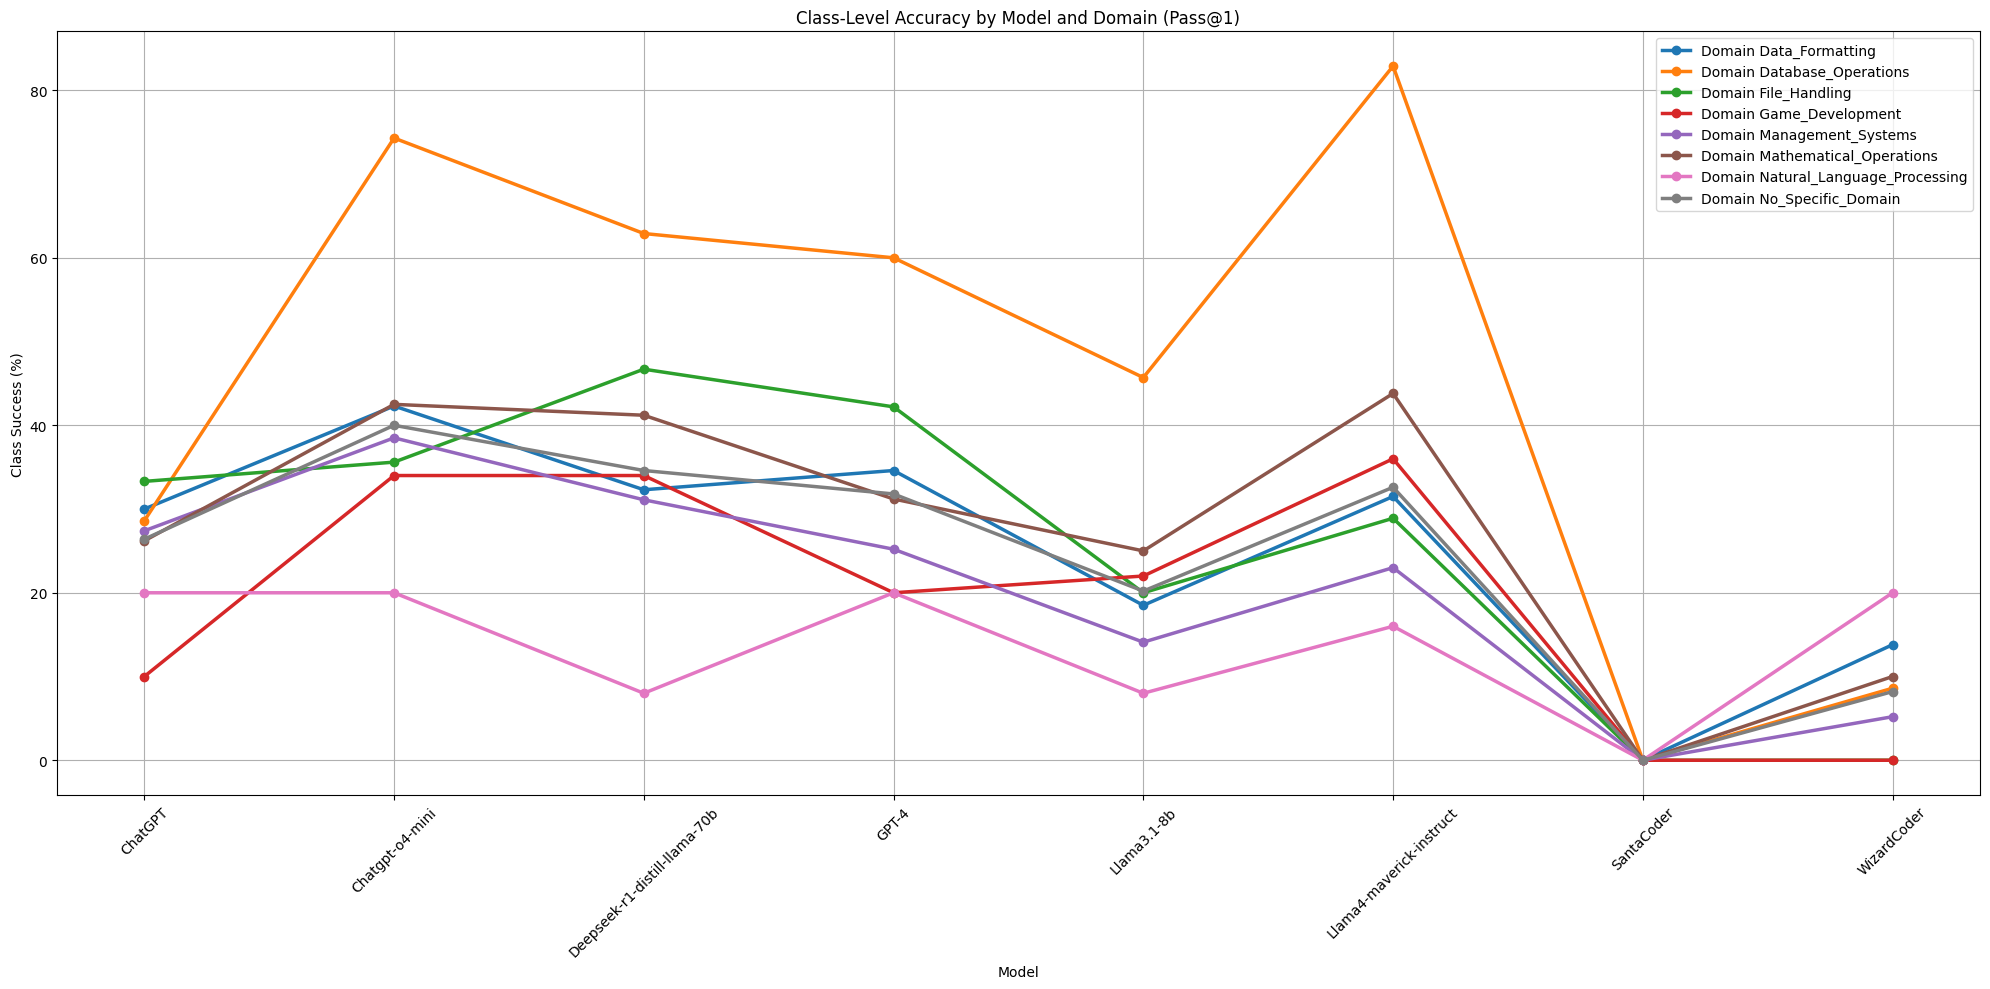

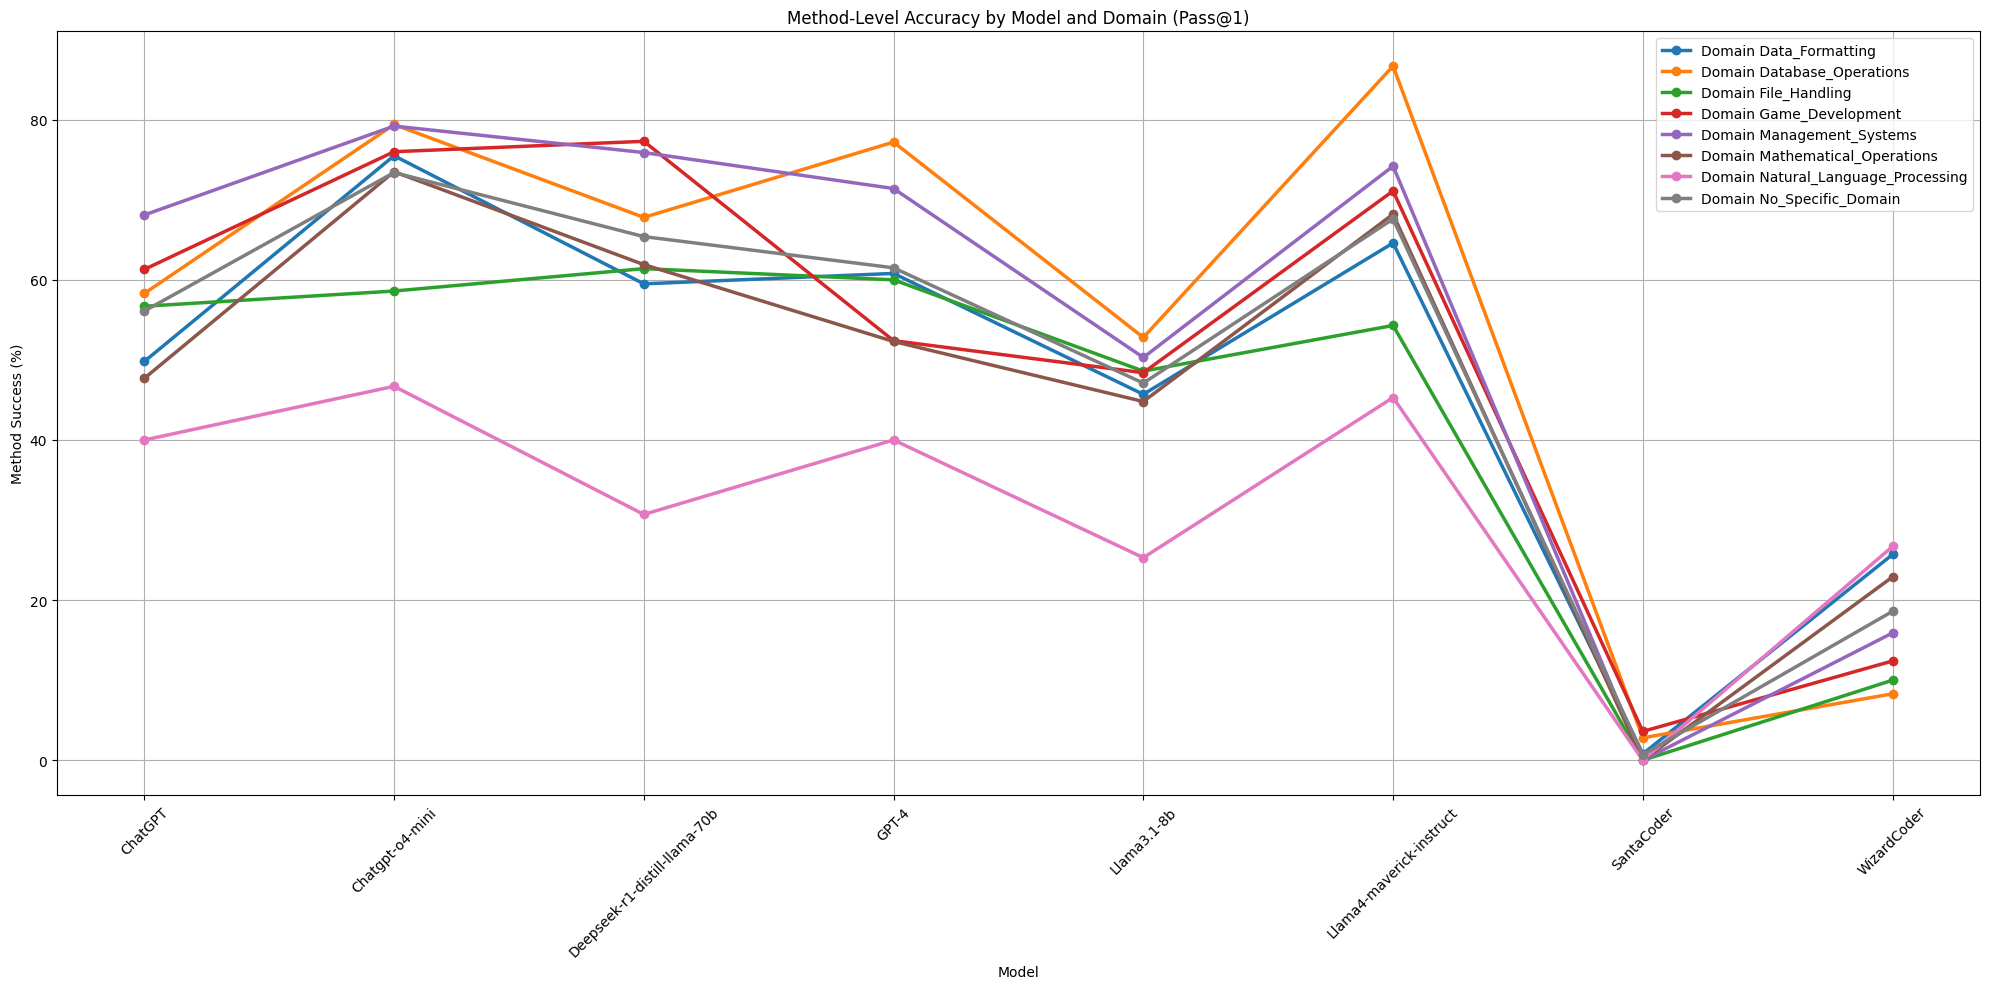

In [9]:
import matplotlib.pyplot as plt

def prepare_line_chart_data(domain_tables, metric="Class Success (%)"):
    domain_data = {}
    for domain, df in domain_tables.items():
        pivot = df[df["Pass@k"] == "pass_1"].pivot(index="Model", columns="Pass@k", values=metric)
        domain_data[domain] = pivot["pass_1"]
    return pd.DataFrame(domain_data).sort_index()

# Line plot: Class-level
class_df = prepare_line_chart_data(per_domain_tables, "Class Success (%)")
plt.figure(figsize=(20, 10))
for domain in class_df.columns:
    plt.plot(class_df.index, class_df[domain], marker='o', label=f"Domain {domain}", linewidth=2.5)
plt.title("Class-Level Accuracy by Model and Domain (Pass@1)")
plt.xlabel("Model")
plt.ylabel("Class Success (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Line plot: Method-level
method_df = prepare_line_chart_data(per_domain_tables, "Method Success (%)")
plt.figure(figsize=(20, 10))
for domain in method_df.columns:
    plt.plot(method_df.index, method_df[domain], marker='o', label=f"Domain {domain}", linewidth=2.5)
plt.title("Method-Level Accuracy by Model and Domain (Pass@1)")
plt.xlabel("Model")
plt.ylabel("Method Success (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


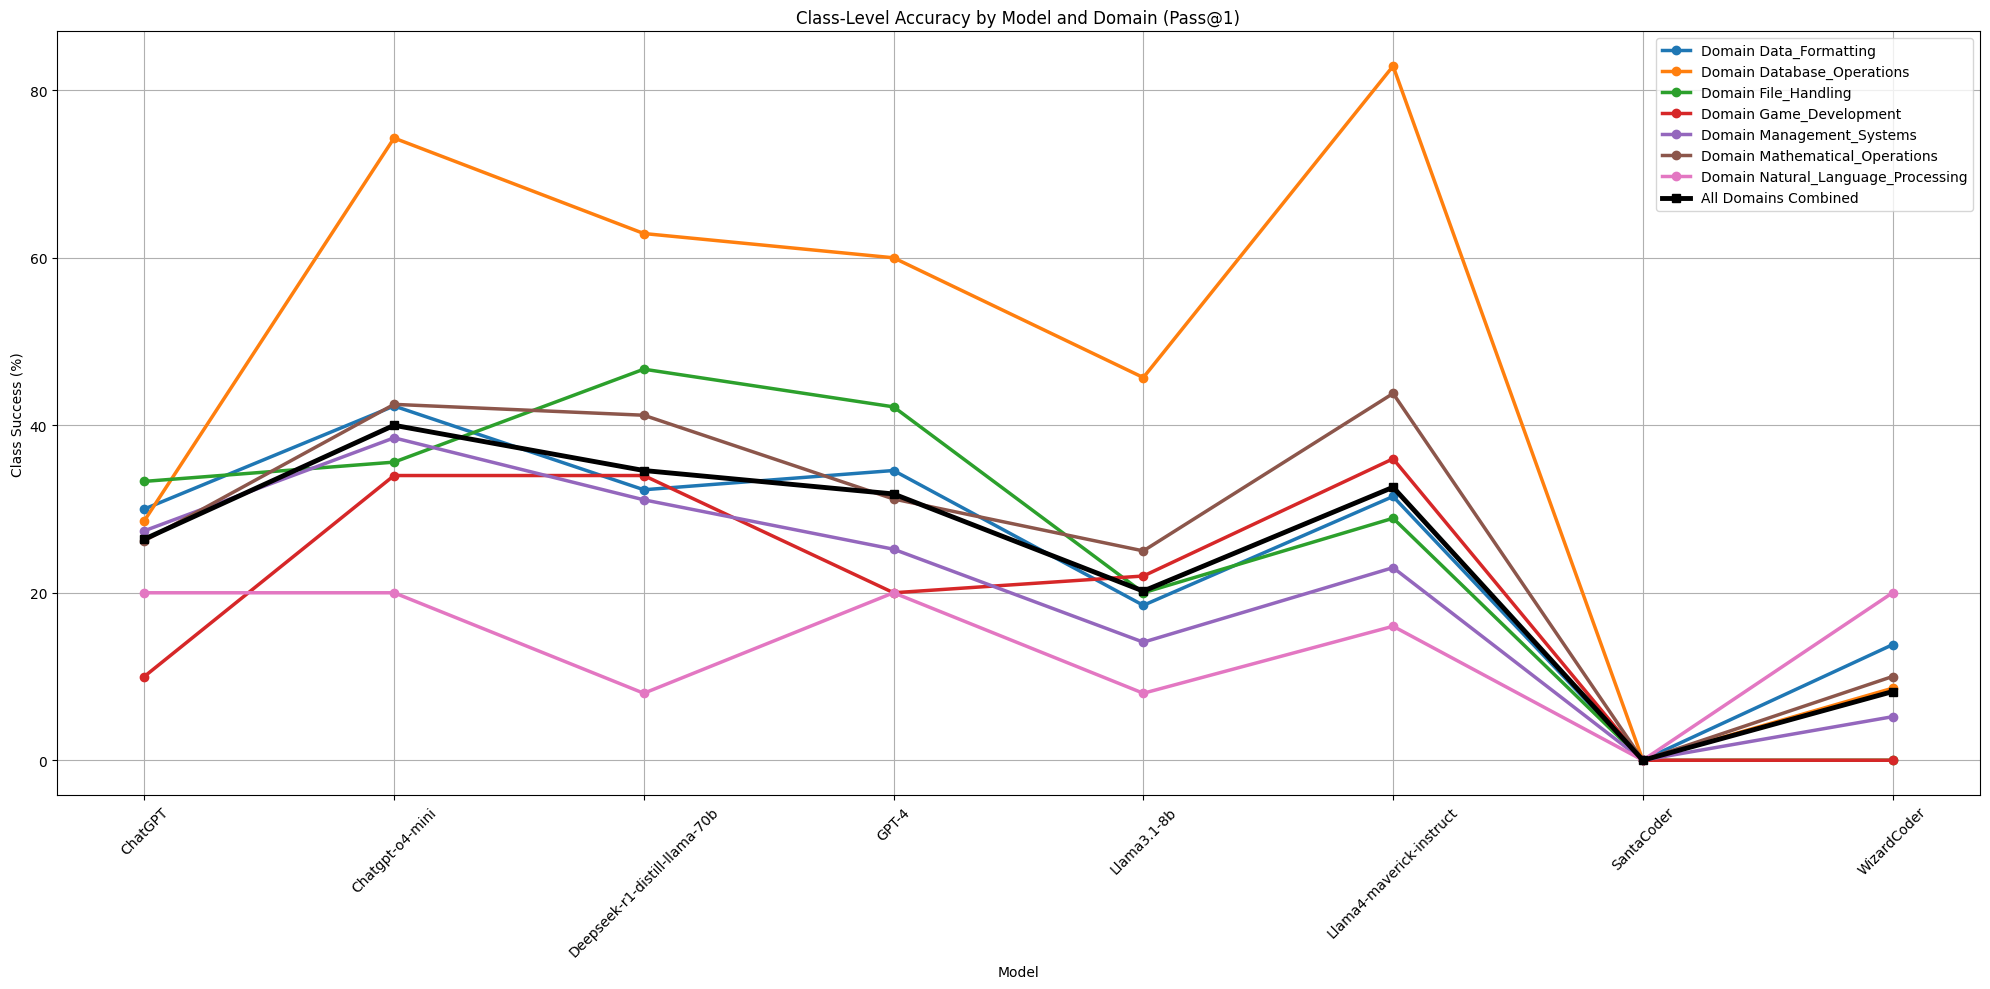

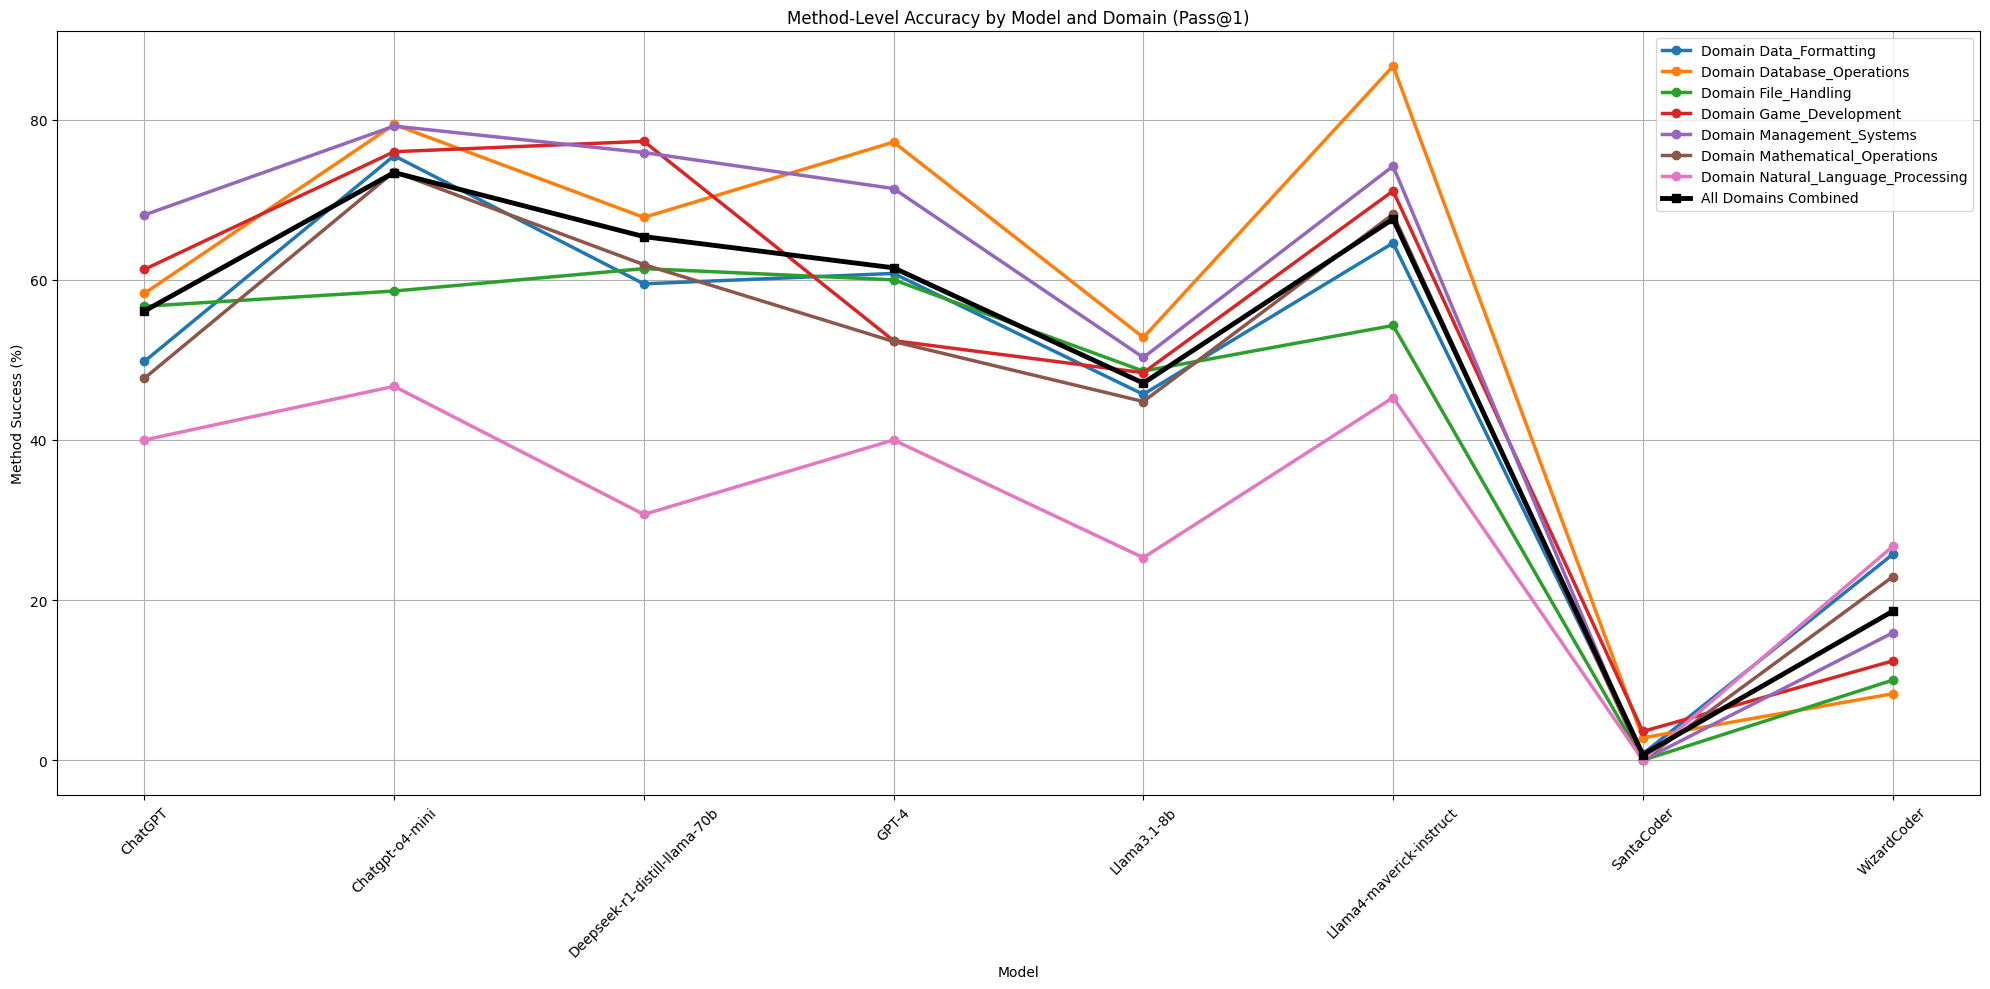

In [10]:
import matplotlib.pyplot as plt

def prepare_line_chart_data(domain_tables, metric="Class Success (%)"):
    domain_data = {}
    for domain, df in domain_tables.items():
        pivot = df[df["Pass@k"] == "pass_1"].pivot(index="Model", columns="Pass@k", values=metric)
        domain_data[domain] = pivot["pass_1"]
    return pd.DataFrame(domain_data).sort_index()

# Line plot: Class-level
class_df = prepare_line_chart_data(per_domain_tables, "Class Success (%)")
plt.figure(figsize=(20, 10))
for domain in class_df.columns:
    if domain == "No_Specific_Domain":
        plt.plot(class_df.index, class_df[domain], marker='s', label="All Domains Combined",
                 color='black', linewidth=3.5)
    else:
        plt.plot(class_df.index, class_df[domain], marker='o', label=f"Domain {domain}", linewidth=2.5)
plt.title("Class-Level Accuracy by Model and Domain (Pass@1)")
plt.xlabel("Model")
plt.ylabel("Class Success (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Line plot: Method-level
method_df = prepare_line_chart_data(per_domain_tables, "Method Success (%)")
plt.figure(figsize=(20, 10))
for domain in method_df.columns:
    if domain == "No_Specific_Domain":
        plt.plot(method_df.index, method_df[domain], marker='s', label="All Domains Combined",
                 color='black', linewidth=3.5)
    else:
        plt.plot(method_df.index, method_df[domain], marker='o', label=f"Domain {domain}", linewidth=2.5)
plt.title("Method-Level Accuracy by Model and Domain (Pass@1)")
plt.xlabel("Model")
plt.ylabel("Method Success (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
